In [2]:
# KMEANS CLUSTERING

import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt  
import seaborn as sns             
%matplotlib inline
import squarify                   #Treemaps

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings                    
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:/MadhuPES/SEMESTER6/PRASUNET/Prasunet_ML_02/Dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
## Check shape of dataset, rows, columns, duplicate entries & missing values

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 200
Number of features (columns) in the dataset are: 5
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 0


In [5]:
## Feature characteristics (datatypes, and descriptive statistics)

print('\n')
print(df.info())
print('---'*25, '\n', df.describe(include='all').T, '---'*25, '\n')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
--------------------------------------------------------------------------- 
                         count unique     top freq   mean        std   min  \
CustomerID              200.0    NaN     NaN  NaN  100.5  57.879185   1.0   
Gender                    200      2  Female  112    NaN        NaN   NaN   
Age                     200.0    NaN     NaN  NaN  38.85  13.969007  18.0   
Annual Income (k$)      200.0    NaN     NaN  NaN  60.56  26.264721  15.0   
Spending Sco

In [6]:
df.rename(columns = {'Annual Income (k$)' : 'Income(k$/yr)', 'Spending Score (1-100)' : 'SpendScore(1-100)'}, inplace=True)
df = df.drop(columns=['CustomerID'])

print(df.columns)

Index(['Gender', 'Age', 'Income(k$/yr)', 'SpendScore(1-100)'], dtype='object')


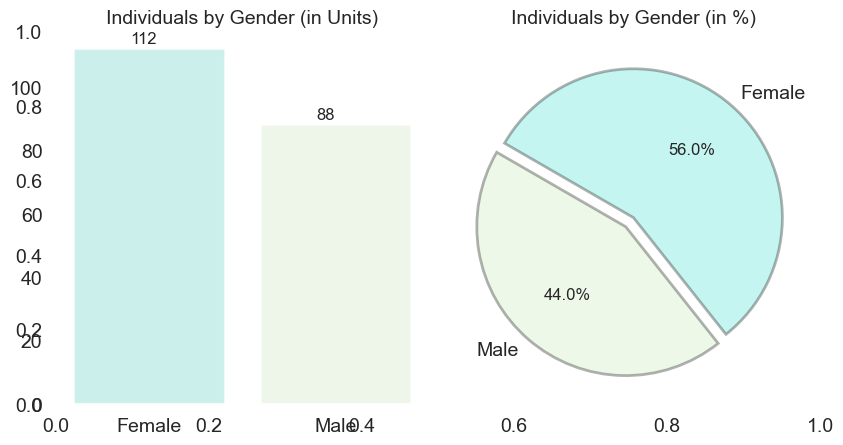

In [7]:
## Gender feature analysis

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(9,5))
my_pal = ('#40E0D0', '#c7e9b4')
my_xpl = [0.0, 0.08]

## Total Individuals by Gender (in Units)
plt.subplot(1,2,1)
plt.title('Individuals by Gender (in Units)', fontsize=14)
ax = sns.countplot(x="Gender", data=df, palette=my_pal, order=df['Gender'].value_counts().index, alpha=0.3)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+2))
plt.xlabel(None)
plt.ylabel(None)

## Total Individuals by Gender (in %)
plt.subplot(1,2,2)
plt.title('Individuals by Gender (in %)',fontsize=14)
df['Gender'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f%%')

plt.show()

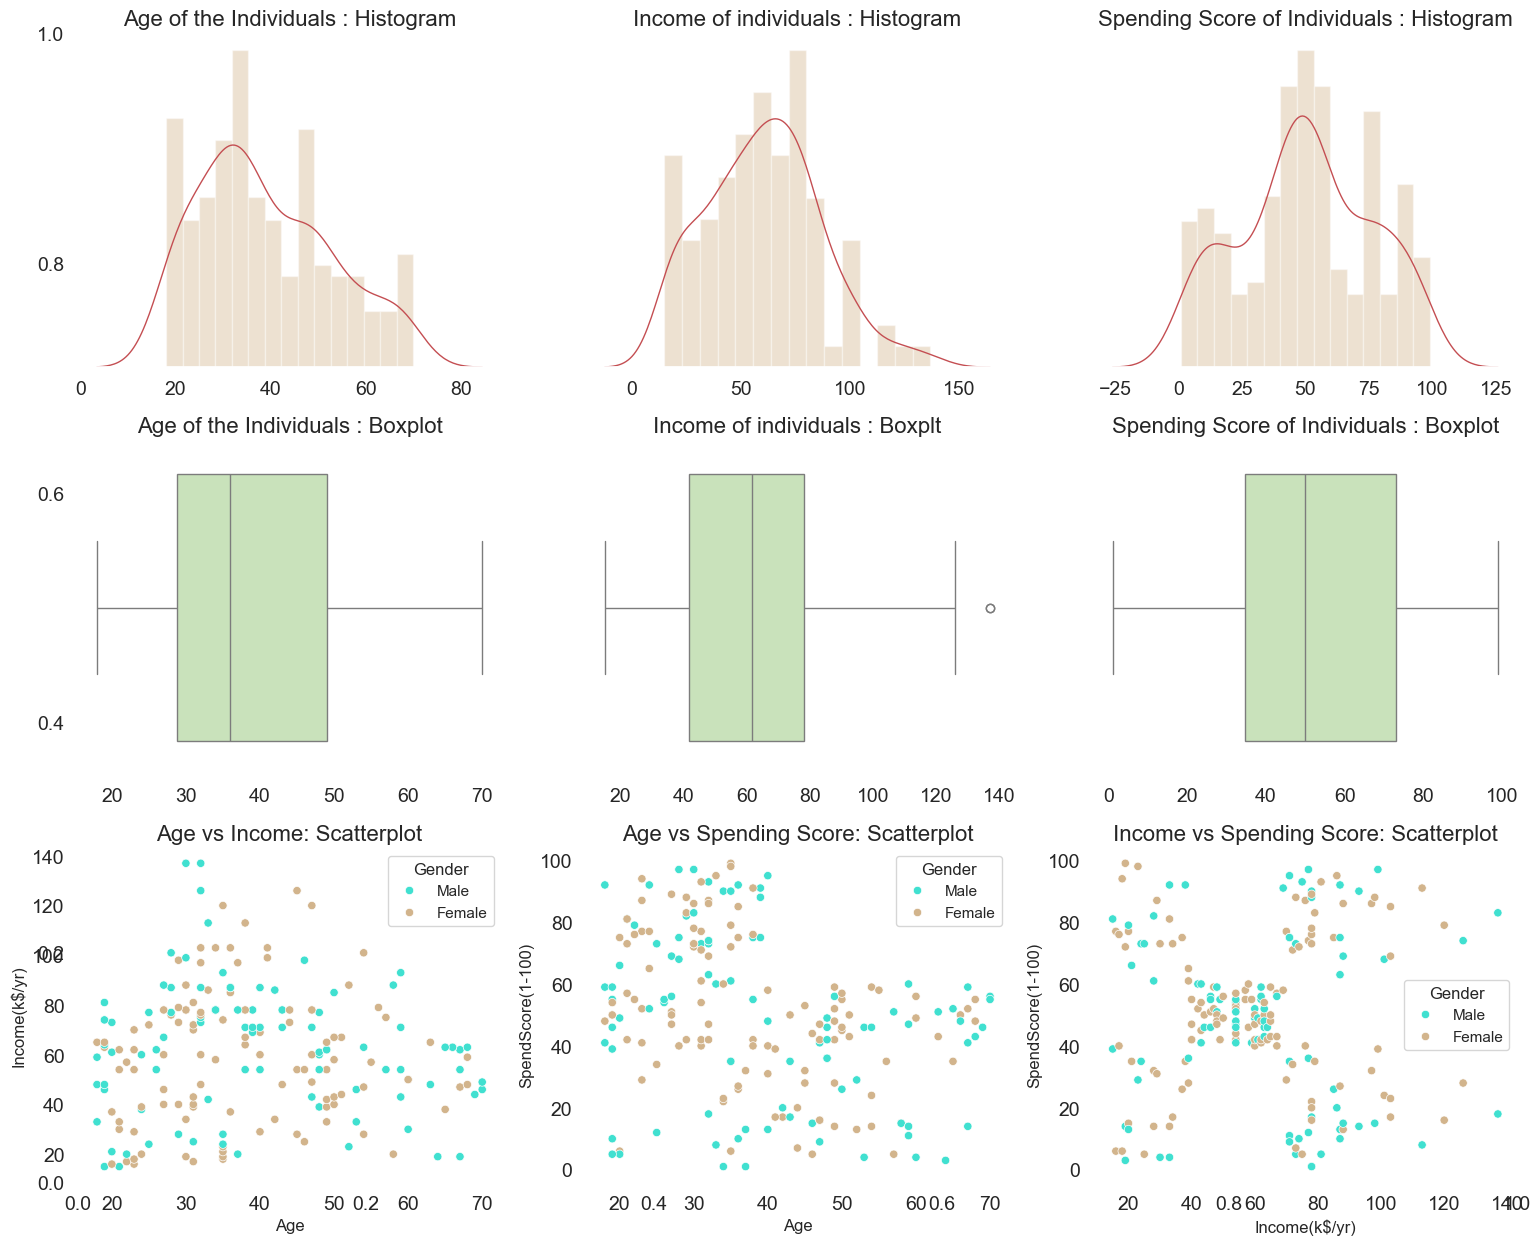

In [8]:
## Let's understand the patterns and trends in the numerical variables
## Age, Income(k$/yr), and SpendScore(1-100) 

plt.subplots(figsize=(16,13))

plt.subplot(3,3,1)
plt.title('Age of the Individuals : Histogram', fontsize=16)
sns.distplot(df['Age'], color='#D2B48C', bins=15, kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,2)
plt.title('Income of individuals : Histogram', fontsize=16)
sns.distplot(df['Income(k$/yr)'], color='#D2B48C', bins=15, kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,3)
plt.title('Spending Score of Individuals : Histogram', fontsize=16)
sns.distplot(df['SpendScore(1-100)'], color='#D2B48C', bins=15, kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,4)
plt.title('Age of the Individuals : Boxplot', fontsize=16)
sns.boxplot(df['Age'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,5)
plt.title('Income of individuals : Boxplt', fontsize=16)
sns.boxplot(df['Income(k$/yr)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,6)
plt.title('Spending Score of Individuals : Boxplot', fontsize=16)
sns.boxplot(df['SpendScore(1-100)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,7)
plt.title('Age vs Income: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Income(k$/yr)', hue='Gender', palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,8)
plt.title('Age vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='SpendScore(1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,9)
plt.title('Income vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Income(k$/yr)', y='SpendScore(1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.show()

In [9]:
## Create subset dataframe

X = df[['Income(k$/yr)', 'SpendScore(1-100)']].copy()
print(X.head(5))

   Income(k$/yr)  SpendScore(1-100)
0             15                 39
1             15                 81
2             16                  6
3             16                 77
4             17                 40


In [10]:
## Scale the features

scaler = StandardScaler()
X_kmeans =  scaler.fit_transform(X)
print(X_kmeans)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

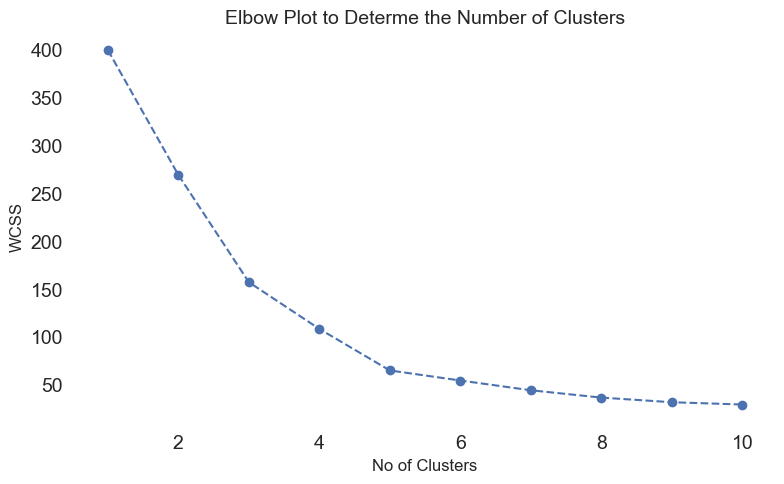

In [11]:
## Elbow method

wcss = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8,5))

plt.plot(range(1,11), wcss, 'o--')
plt.title('Elbow Plot to Determe the Number of Clusters', fontsize=14)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

plt.show()

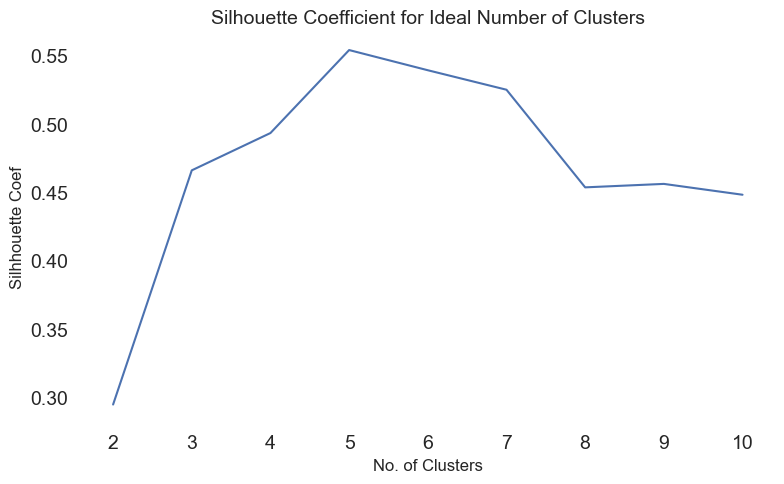

In [12]:
silhouette_coef = []

for cluster in range(2,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 1)
    kmeans.fit(X_kmeans)
    score = silhouette_score(X_kmeans, kmeans.labels_)
    silhouette_coef.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_coef)
plt.xticks(range(2,11))
plt.title('Silhouette Coefficient for Ideal Number of Clusters', fontsize=14)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhhouette Coef')
plt.show()

In [13]:
## Conclusion from Plot:  Model fitting with 5 clusters 

clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(X_kmeans)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [14]:
## Creating a New Dataframe with an appended cluster column

df_Kmeans = df.copy()            
df_Kmeans['Cluster'] = y_kmeans  
print(df_Kmeans.head(5))

   Gender  Age  Income(k$/yr)  SpendScore(1-100)  Cluster
0    Male   19             15                 39        4
1    Male   21             15                 81        2
2  Female   20             16                  6        4
3  Female   23             16                 77        2
4  Female   31             17                 40        4


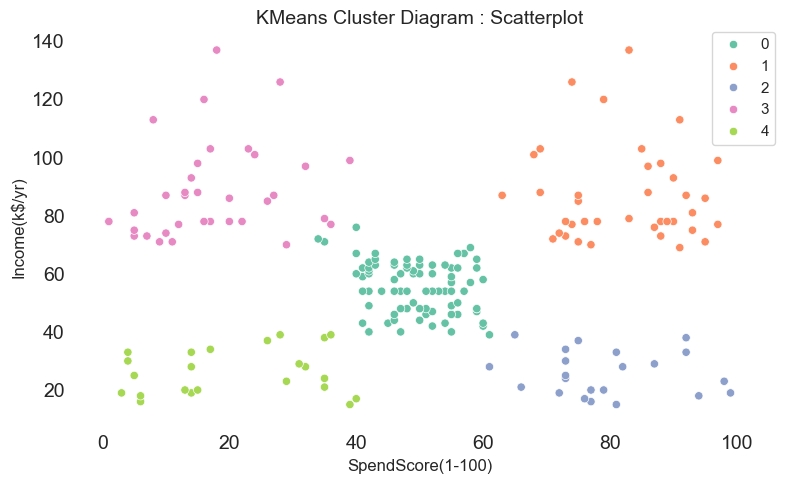

In [15]:
## Visualising the new dataframe with cluster numbers through scatterplot

plt.figure(figsize=(8,5))
plt.title('KMeans Cluster Diagram : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Kmeans, x='SpendScore(1-100)', y='Income(k$/yr)', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

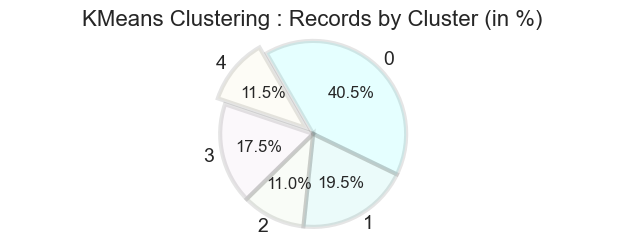

In [22]:
plt.subplot(2,1,2)
my_xpl = [0.0, 0.0, 0.0, 0.0, 0.1]
plt.title('KMeans Clustering : Records by Cluster (in %)', fontsize=16)
sizes = df_Kmeans['Cluster'].value_counts().sort_index() / df_Kmeans['Cluster'].value_counts().sum()*100
labels = sizes.index
plt.pie(sizes, labels = labels, colors=my_pal, explode=my_xpl, counterclock=False, startangle=120, wedgeprops={'alpha':0.1, 'edgecolor' : 'black','linewidth': 3, 'antialiased': True}, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()

([], [])

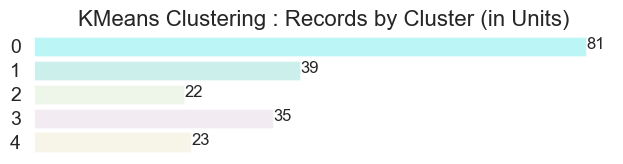

In [24]:
plt.subplot(3,1,3)
plt.title('KMeans Clustering : Records by Cluster (in Units)', fontsize=16)
my_ord = [0,1,2,3,4]
ax = sns.countplot(y="Cluster", data=df_Kmeans,  palette=my_pal, order=my_ord, alpha=0.3)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 0.05, p.get_y()+0.5))
plt.ylabel(None)
plt.xlabel(None)
plt.xticks([])

In [25]:
# Silhouette Score
from sklearn.metrics import silhouette_score

# Assuming 'X1' is your dataset and the K-means model is already fitted
algorithm = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, 
                   tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(X_kmeans)

# Get the cluster labels
labels2 = algorithm.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_kmeans, labels2)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5546571631111091
